In [46]:
#modules
import tensorflow as tf
from tensorflow import keras
from keras import layers

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from tqdm.notebook import tqdm

from sklearn.preprocessing import MinMaxScaler

import haha
from sklearn.metrics import mean_squared_error
tf.random.set_seed(7)

In [47]:
#load dataset
df=pd.read_csv("../../Data/Harian/Rata Harian.csv").iloc[:,2]

#get data from 15 latest months
df=df[-(30*15):]

In [48]:
#Rescale the data to the range of 0-to-1
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df.values.reshape(-1,1))

In [49]:
#train test split; train 12 months, 3 months for testing
train=df[:30*12]; test=df[30*12:]

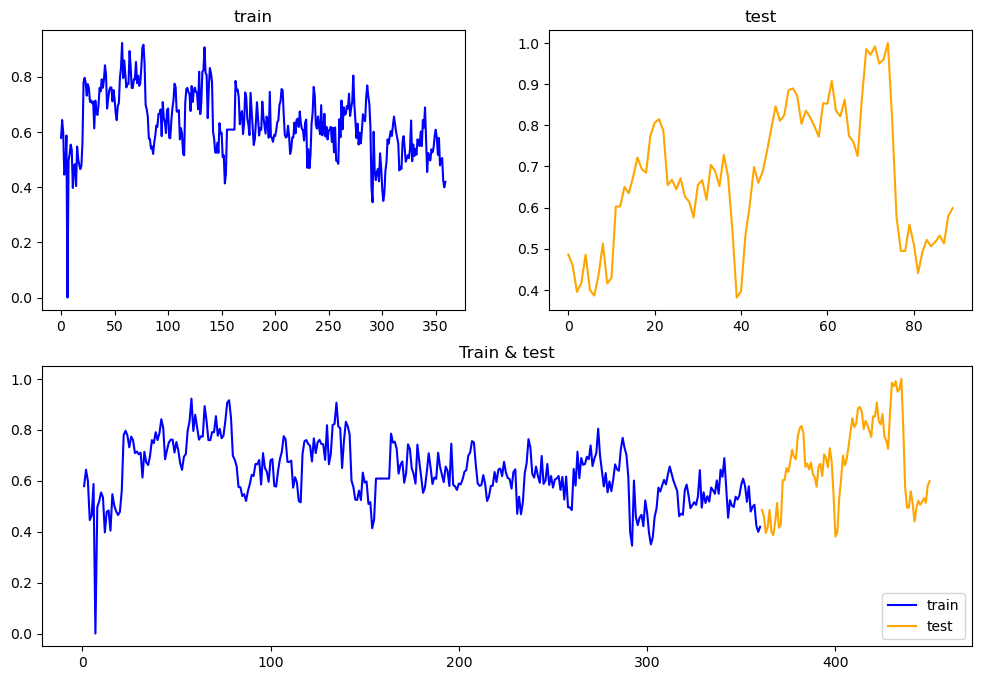

In [50]:
haha.plottraintest(train, test)

In [51]:
# reshape into X=t and Y=t+1

t=3
trainX, trainY = haha.lag(train,t)
testX, testY = haha.lag(test,t)

In [52]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [53]:
# create and fit the LSTM network
def getmodel():
    model = keras.Sequential([
        keras.layers.LSTM(4, input_shape=(1, t)),
        keras.layers.Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=keras.metrics.RootMeanSquaredError())
    return model

In [54]:
model=getmodel()
model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=1, validation_data=(testX, testY))

Epoch 1/100
6/6 [==============================] - 3s 127ms/step - loss: 0.4172 - root_mean_squared_error: 0.6459 - val_loss: 0.4875 - val_root_mean_squared_error: 0.6982
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 0.4037 - root_mean_squared_error: 0.6354 - val_loss: 0.4726 - val_root_mean_squared_error: 0.6875
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 0.3905 - root_mean_squared_error: 0.6249 - val_loss: 0.4581 - val_root_mean_squared_error: 0.6768
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 0.3776 - root_mean_squared_error: 0.6145 - val_loss: 0.4437 - val_root_mean_squared_error: 0.6661
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 0.3649 - root_mean_squared_error: 0.6041 - val_loss: 0.4297 - val_root_mean_squared_error: 0.6555
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 0.3526 - root_mean_squared_error: 0.5938 - val_loss: 0.4159 - val_root_mean_s

In [55]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

3/3 [==============================] - 0s 4ms/step


In [56]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

df=scaler.inverse_transform(df)
testY = scaler.inverse_transform([testY])
trainY = scaler.inverse_transform([trainY])

In [57]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 6.62 RMSE
Test Score: 8.60 RMSE


In [63]:
haha.plot_predicted(df, trainPredict, testPredict, t)

AttributeError: module 'haha' has no attribute 'plot_predicted'